In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
metadata = pd.read_csv('metadata.csv')

In [3]:
metadata.head()

,itemid,title,genres,country,running_min
0,55396,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
1,42858,본 얼티메이텀 (2007),액션,미국,-1
2,121058,어느 가족 (2018),드라마,일본,121
3,4285,펀치 드렁크 러브 (2002),코미디,미국,95
4,36948,자토이치 (2003),액션/시대극,일본,115


In [4]:
ratings = pd.read_csv('ratings-train.csv')
ratings.head()
# itemid 가 N인 영화에 0-10점 중에서 N점을 주었다.

,userid,itemid,rating
0,MVdyRkY=,55396,9
1,TzZqVQ==,55396,7
2,REI4WTI=,55396,9
3,bDJ4aA==,55396,7
4,QktyMw==,55396,7


(array([ 1628.,  1273.,   846.,  1316.,  2027.,  4124.,  6840.,  8467.,
         7162., 10403.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

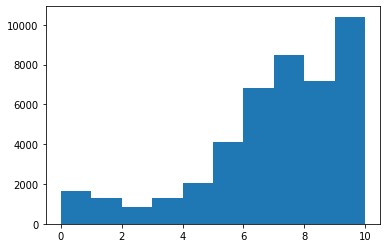

In [5]:
# ratings data의 rating 분포
plt.hist(ratings['rating'])

# 엄청 짜게 주진 않는다. 보통 8-9점이 많은데 데이터셋이 모든 평점을 가져오진 않아서 조금 편향된 데이터가 나타났다고 볼 수 있다

In [6]:
ratings_with_movies = pd.merge(ratings, metadata, how='left', on = 'itemid')
ratings_with_movies.head()

,userid,itemid,rating,title,genres,country,running_min
0,MVdyRkY=,55396,9,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
1,TzZqVQ==,55396,7,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
2,REI4WTI=,55396,9,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
3,bDJ4aA==,55396,7,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
4,QktyMw==,55396,7,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121


In [7]:
ratings_with_movies['title'].nunique()

5832

In [8]:
#ratings_with_movies.groupby('userid')['title'].value_counts().plot(kind='bar')

In [9]:
users = ratings_with_movies['userid'].unique()

In [10]:
tmp = ratings_with_movies[ratings_with_movies['userid'] == users[0]]['genres'].value_counts()

In [11]:
tmp.nlargest(3)

드라마    4
스릴러    2
코미디    1
Name: genres, dtype: int64

In [12]:
# meta data 의 장르 분포
all_genres = ratings_with_movies['genres']

In [13]:
all_genres[0].strip().split('/')

['로맨스', '멜로', '코미디']

In [14]:
# genres = {}
# if '로맨스' not in genres.keys():
#     genres['로맨스'] = 1
# genres

In [15]:
genres = {}
for a in all_genres:
#     tmp_arr = a.strip().split('/')
    print(type(a) == type('str'))
#     for g in tmp_arr:
#         if g not in genres.keys():
#             genres[g] = 1
#         else:
#             genres[g] += 1

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Tr

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

---

## Sampling Data

In [16]:
# 컴퓨터는 첫번째을 고르고 그 값을 가지고 정해진 계산을 통해 랜덤으로 보이는 여러 난수를 계산해낸다.
# 따라서 맨 처음 랜덤 숫자를 설정하면 모든 컴퓨터에서 난수 값이 나온다.

# frac = faction, 0.2 = 20% data를 샘플링
ratings_valid = pd.read_csv('ratings-valid.csv').sample(random_state=17, frac=0.2)

ratings_valid.head()

,userid,itemid,rating
1000,NEpQdHA=,53983,9
3543,OTQzaFo=,108037,8
4826,M2p2QTk=,87427,7
4330,REhkazM=,95755,3
3635,MWNiOE0=,70107,7


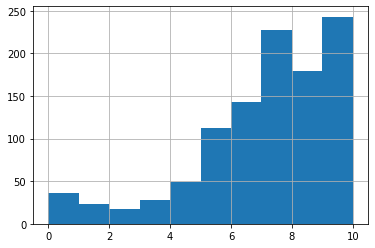

In [17]:
ratings_valid['rating'].hist()

### 오프라인 평가를 위한 RMSE 함수 만들기

In [18]:
expected = ratings_valid[1:10]
answer = ratings_valid[:10]
expected

,userid,itemid,rating
3543,OTQzaFo=,108037,8
4826,M2p2QTk=,87427,7
4330,REhkazM=,95755,3
3635,MWNiOE0=,70107,7
1685,NzZtTHg=,111292,9
5242,MkpYaGk=,125049,5
2034,RjVKVw==,48632,3
1910,REI4WTI=,47519,6
1975,M0szalc=,108035,7


In [19]:
answer

,userid,itemid,rating
1000,NEpQdHA=,53983,9
3543,OTQzaFo=,108037,8
4826,M2p2QTk=,87427,7
4330,REhkazM=,95755,3
3635,MWNiOE0=,70107,7
1685,NzZtTHg=,111292,9
5242,MkpYaGk=,125049,5
2034,RjVKVw==,48632,3
1910,REI4WTI=,47519,6
1975,M0szalc=,108035,7


#### 나의 코드

In [20]:
# def rmse(expected, answer):
#     sum_ratings = 0
#     df = pd.merge(answer, expected, how = 'left', on = 'userid').fillna(0)
#     for idx in range(0, 10):
#         sum_ratings += ((df['rating_x'][idx]-df['rating_y'][idx]) ** 2)
#     return (( sum_ratings/10 ) ** 0.5)

# rmse(expected, answer)
# rmse_val = rmse(expected, answer)
# print(rmse_val)

#### 치완님 코드

In [21]:
def rmse(expected, answer):
    joined = pd.merge(answer, expected, on=['userid', 'itemid'], how = 'left')
    joined['rating_y'] = joined['rating_y'].fillna(0)
    joined['square_error'] = (joined['rating_x'] - joined['rating_y']) ** 2
    return np.sqrt(joined['square_error'].mean())
rmse(expected, answer)

2.8460498941515415

In [22]:
def predict(u, i):
    return 8.0

expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
expected.head()

,userid,itemid,rating
1000,NEpQdHA=,53983,8.0
3543,OTQzaFo=,108037,8.0
4826,M2p2QTk=,87427,8.0
4330,REhkazM=,95755,8.0
3635,MWNiOE0=,70107,8.0


In [23]:
rmse(expected, ratings_valid)

2.7423239390279464

### 모든 예측을 전체 평점의 평균으로 계산하는 추천 로직 (p. 24) - train 데이터 이용

In [24]:
# 나의 코드 == 치완님 코드

def predict(u, i):
    return ratings['rating'].mean()
expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
rmse(expected, ratings_valid)

2.418031954051125

In [25]:
# 치완님 코드
r_mean = ratings['rating'].mean()
def predict(u, i):
    return r_mean
expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
rmse(expected, ratings_valid)

2.418031954051125

### 모든 예측을 주어진 사용자의 평균 평점으로 계산하는 추천 로직 (p. 25)

In [26]:
# 나의 코드 == 치완님 코드

# groupby를 이용한 코드
# def predict(u, i):
#     return train.groupby('userid')['rating'].mean().loc[u]

def predict(u, i):
    return ratings[ratings['userid'] == u]['rating'].mean()
expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
rmse(expected, ratings_valid)

2.1909154513519242

### 모든 예측을 주어진 영화의 평균 평점으로 계산하는 추천 로직 (p. 25)

In [27]:
#나의 코드
def predict(u, i):
    return ratings[ratings['itemid'] == i]['rating'].mean()
expected = ratings_valid.copy()
expected['rating'] = expected.apply(lambda row: predict(row['userid'], row['itemid']), axis = 1)
rmse(expected, ratings_valid)

2.237838086446809

---

## User-User Collaborative Filtering

### 1. 유사도 함수 (Jaccard Similarity)

In [28]:
# set 사용법 
a = set([1, 2, 3])
b = set([0, 1, 2, 3, 4, 5])
a | b

{0, 1, 2, 3, 4, 5}

In [29]:
set(ratings_with_movies[ratings['userid'] == 'TERhUA==']['title'])

{'고잉 더 디스턴스 (2010)',
 '그녀는 거짓말을 너무 사랑해 (2013)',
 '나의 PS 파트너 (2012)',
 '매직 아워 (2008)',
 '보트 (2009)',
 '수상한 그녀 (2013)',
 '옥자 (2017)',
 '플란다스의 개 (2000)'}

### 서로 다른 사용자 u, v에 대해 jaccard similarity 계산하는 함수 (p. 28)

In [30]:
# 나의 코드
def sim(u, v):
    set_u = set(ratings_with_movies[ratings['userid'] == u]['title'])
    set_v = set(ratings_with_movies[ratings['userid'] == v]['title'])
    return len(list(set_u & set_v)) / len(list(set_u | set_v))
sim('TERhUA==', 'Q1ladXM=')

0.08333333333333333

In [31]:
# 치완님 코드
# 테이블 전체를 한번에 보고 userid 값을 key로 하고 itemid들의 set 집합을 value로 가지는 dictionary를 사전에 저장

all_users = ratings['userid'].unique()
i_dict = {u: set(ratings[ratings['userid'] == u]['itemid']) for u in all_users}
def sim(u, v):
#     i_u = set(ratings_with_movies[ratings['userid'] == u]['itemid'])
#     i_v = set(ratings_with_movies[ratings['userid'] == v]['itemid'])
    i_u = i_dict[u]
    i_v = i_dict[v]
    
    cup = i_u | i_v
    if len(cup) == 0:
        return 0.0
    cap = i_u & i_v
    return len(cap) / len(cup)

sim('TERhUA==', 'Q1ladXM=')

0.08333333333333333

### 비슷한 영화를 소비한 k명의 사용자 집합 U_u를 계산하는 (p. 29)

In [32]:
# 나의 코드
# all_users = ratings['userid'].unique()
# i_dict = {u: set(ratings[ratings['userid'] == u]['itemid']) for u in all_users}
import operator
def similar_users(u, k):
    i_u = i_dict[u]
    sim_dic = {}
    for i_key, i_value in i_dict.items():
        if i_key == u:
            continue
        else:
            sim_dic[i_key] = sim(u, i_key)
            
    sorted_dic = sorted(sim_dic.items(), key=operator.itemgetter(1), reverse = True)[:k]
    # 그냥 sorted_dic 하면 유사도가 함께나오므로 아이디만 저장한 DataFrame 만듦!
    return pd.DataFrame([sorted_id for sorted_id, v in sorted_dic]) 
similar_users('TERhUA==', 5)

,0
0,YzkyQQ==
1,NGdmcVQ=
2,M2hETGQ=
3,V0NyaQ==
4,ODQ2R0c=


In [33]:
# 치완님 코드
def similar_users(u, k):
    sims = sorted([(sim(u, v), v) for v in all_users if u!= v], reverse = True)
    topk_users = [v for s, v in sims][:k]
    return pd.DataFrame(topk_users, columns=['userid'])
similar_users('TERhUA==', 5)

,userid
0,YzkyQQ==
1,NGdmcVQ=
2,M2hETGQ=
3,V0NyaQ==
4,QTB5d0E=


##### 완벽한 코드를 짜기 전 과정

In [34]:
u = 'TERhUA=='
k = 5
sims = [(sim(u, v), v) for v in all_users if u!=v]
sorted_sims = sorted(sims, reverse=True)
topk_users = [v for s, v in sorted_sims[:k]]
pd.DataFrame(topk_users, columns=['userid'])

,userid
0,YzkyQQ==
1,NGdmcVQ=
2,M2hETGQ=
3,V0NyaQ==
4,QTB5d0E=


### 소비자 𝑢와 영화 𝑖에 대한 예측 평점을 계산하는 𝑝𝑟𝑒𝑑𝑖𝑐𝑡(𝑢,𝑖)함수

여기서부터~~~ 치완님 ipynb 파일 확인

In [40]:
def predict(u, i):
    topk_users = similar_users(u, 5)
    topk_users['sim'] = topk_users.apply(lambda row: sim(u, row['userid']), axis=1)
    i_ratings = ratings[ratings['itemid'] == i]
    joined = pd.merge(topk_users, i_ratings, on='userid')
    joined['weighted_rating'] = joined['sim'] * joined['rating']
    
    # 해당 소비자 u를 예측하기 위한 여러 사람 비중의 합이 1이 되도록 하기 위해서 마지막에 sim값의 합으로 나눠준다.
    return joined['weighted_rating'].sum() / joined['sim'].sum()
predict('TERhUA==', 86909)

6.0

##### 완벽한 코드를 짜기 전 과정

In [36]:
u = 'TERhUA=='
i = 86909
topk_users = similar_users(u, 5)
topk_users['sim'] = topk_users.apply(lambda row: sim(u, row['userid']), axis=1)
topk_users

,userid,sim
0,YzkyQQ==,0.142857
1,NGdmcVQ=,0.125000
2,M2hETGQ=,0.125000
3,V0NyaQ==,0.111111
4,QTB5d0E=,0.111111


In [42]:
i_ratings = ratings[ratings['itemid'] == i]
joined = pd.merge(topk_users, i_ratings, on='userid')
joined

,userid,sim,itemid,rating
0,YzkyQQ==,0.142857,86909,6


In [43]:
joined['weighted_rating'] = joined['sim'] * joined['rating']

In [45]:
joined['weighted_rating'].sum() / joined['sim'].sum()

6.0